<a href="https://colab.research.google.com/github/andrybrew/data-science-machine-learning-BI/blob/main/006a_emotion_analysis_multi_class_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion Analysis with IndoBERT (Multi-Class Classification)**

This notebook will demonstrate how to analyze emotions using **IndoBERT**, a pre-trained transformer model specialized for the Indonesian language. The dataset to be analyzed will consist of Twitter posts related to interest rate policies by **Bank Indonesia**.



## **Interest Rate Dataset**
The interest rate is a critical tool used by central banks like **Bank Indonesia** to influence the country's economic activities. It affects how much it costs to borrow money and the return on savings, thus directly impacting people's spending and saving behaviors.

The recent decision by the **Board of Governors of Bank Indonesia** to increase the **BI-7 day reverse repo rate** by **25 basis points to 6%** is a strategic move to tackle economic challenges like **inflation** or **currency depreciation**. Such changes can have significant effects on various sectors, including loans, mortgages, savings, and investments. Understanding the public's reaction to the interest rate hike will yield insights into the general sentiment and expectations of this policy decision on everyday lives and economic outlooks.

### **Data Source:** Twitter  
- **Keyword:** suku bunga since:2023-10-19  
- **Collection Date:** October 22, 2023  
- **Total Tweets:** 503  
- **Language:** Bahasa Indonesia  


## **Importing Required Libraries**
We will install and import the necessary libraries for text processing, emotion classification, and visualization.

In [1]:
# Install Huggingface Transformers
! pip install huggingface transformers --quiet

In [2]:
import pandas as pd
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification



## **Importing Dataset**
We will load the dataset using **pandas.read_csv()** from a publicly available URL.

In [3]:
# Fetching the dataset from GitHub
data_url = "https://raw.githubusercontent.com/andrybrew/IHT-SEM1302-30Okt/main/data/001_suku-bunga.csv"

# Using pandas read_csv function to load the data from the URL directly into a DataFrame
df_tweet = pd.read_csv(data_url)



## **Loading the IndoBERT Model**
We will use the **thoriqfy/indobert-emotion-classification** model from Hugging Face to classify emotions. The necessary tokenizer and model will be set up for processing.

In [6]:
# Download Pretrained Model for Emotion Classification
emotion_pretrained = "thoriqfy/indobert-emotion-classification"

# Set Model and Tokenizer for Emotion Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_pretrained)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_pretrained)

# Create emotion classifier using huggingface pipeline
emotion_analysis = pipeline("text-classification", model=emotion_model, tokenizer=emotion_tokenizer)

Device set to use cpu


In [8]:
# Download Pretrained Model
pretrained = "thoriqfy/indobert-emotion-classification"

In [9]:
# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Create sentiment classifier using huggingface pipeline
emotion_analysis = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use cpu




## **Performing Emotion Analysis**
We will apply **IndoBERT** to classify each tweet into multiple emotion categories. The classification will include:
- Tokenizing and truncating text to match model input requirements.
- Predicting emotion labels based on model outputs.
- Mapping predictions to predefined emotion categories.

In [10]:
def get_emotion(text):
    # Tokenize text and truncate to ensure it doesn't exceed the maximum limit
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:min(len(tokens), 512 - 2)]  # 2 tokens for [CLS] and [SEP]

    # Convert tokens back to string
    truncated_text = tokenizer.convert_tokens_to_string(tokens)

    # Get emotion
    output = emotion_analysis(truncated_text)[0]
    label = output['label']
    score = output['score']
    return label, score

In [11]:
# Test with one sentence
text = "Kebijakannya kacau balau"
emotion, score = get_emotion(text)
print(f'The emotion is: {emotion} with a score of: {score}')

The emotion is: Anger with a score of: 0.745032012462616




## **Applying Emotion Analysis to Dataset**
We will apply the emotion classification function to each row in the dataset and create new columns for:
- **Emotion Label** (e.g., Sadness, Anger, Happy, etc.)
- **Confidence Score** of the classification

In [12]:
# Get emotion label for each row in dataframe
df_tweet[['emotion', 'score']] = df_tweet['text'].apply(lambda x: pd.Series(get_emotion(x)))

In [13]:
# Show Tweet with emotion
df_tweet[['text', 'emotion', 'score']]

,text,emotion,score
0,Disiplin Fiskal: Rasio utang lebih dari 60% da...,Neutral,0.997473
1,"BI Kerek Suku Bunga Acuan, Pengusaha Berharap ...",Neutral,0.973557
2,[BREAKING] Bank Indonesia menaikkan suku bunga...,Neutral,0.993195
3,#EURUSD : Menanti Kebijakan Suku Bunga ECB an...,Neutral,0.996338
4,Muncul di browse youtube gua video finfluencer...,Anger,0.995824
...,...,...,...
498,Terbaru! Konsensus Ekonom Ramal BI Tahan Suku ...,Neutral,0.987443
499,IHSG Diprediksi Sideways Menanti Suku Bunga BI...,Neutral,0.988282
500,"Selepas keluar dari Mesir, Bani Israil mendiri...",Neutral,0.998441
501,Pagi. Semalam bursa AS ditutup melemah di teng...,Neutral,0.992391


<Axes: xlabel='emotion', ylabel='count'>

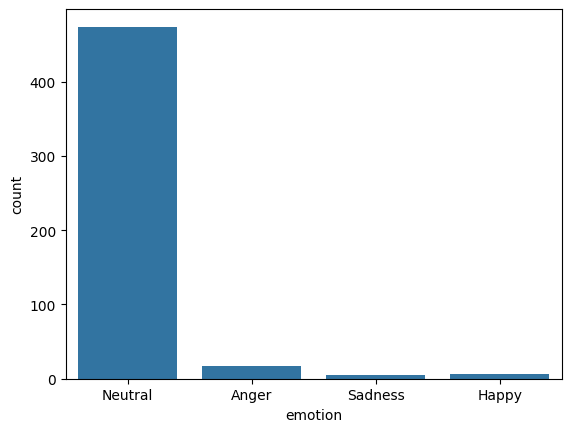

In [14]:
# Visualise the emotion distribution
sns.countplot(x ='emotion', data = df_tweet)